In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Files to load
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [3]:
#Read city file and create dataframe
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#Read ride file and create dataframe
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
#find cells that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get the number of data points per city type
print(sum(city_data_df['type']=="Urban"))
print(sum(city_data_df['type']=="Suburban"))
print(sum(city_data_df['type']=="Rural"))

66
36
18


In [10]:
#Inspect ride data files
print(ride_data_df.count())
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [11]:
#combine data into one dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
#Create the Urban city dataframe
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
#Create the Suburban city dataframe
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [14]:
#Create the Rural city dataframe
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
#Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [16]:
#Get the number of rides for suburban and rural cities
suburban_ride_count=suburban_cities_df.groupby(['city']).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(['city']).count()["ride_id"]

In [17]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [18]:
#Get average fare for cities in the suburban and rural cities
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
print(suburban_avg_fare.head())
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']
print(rural_avg_fare.head())

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [19]:
#Get the average number of drivers for each city type
urban_drive_count=urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_drive_count=suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_drive_count=rural_cities_df.groupby(['city']).mean()['driver_count']

urban_drive_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

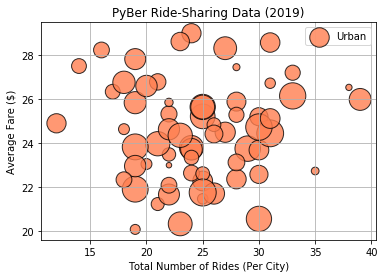

In [20]:
#Scatter plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,
           s=10*urban_drive_count, c='coral',
           edgecolor="k", linewidths=1,
           alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

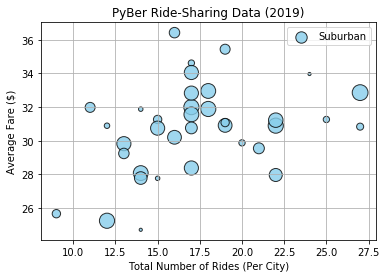

In [21]:
#Scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_drive_count, c='skyblue',
            edgecolor='k', linewidths=1,
            alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

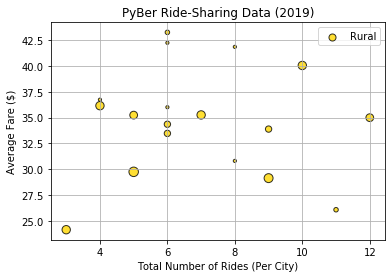

In [22]:
#Scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_drive_count, c='gold',
           edgecolor='k', linewidths=1,
            alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

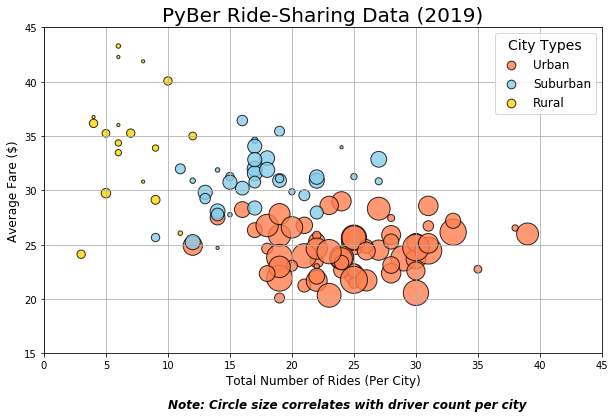

In [23]:
#Scatter plot for all city types
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,
           s=10*urban_drive_count, c='coral',
           edgecolor="k", linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_drive_count, c='skyblue',
            edgecolor='k', linewidths=1,
            alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_drive_count, c='gold',
           edgecolor='k', linewidths=1,
            alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fare ($)',fontsize=12)
plt.xlim(0,45)
plt.ylim(15,45)
plt.grid(True)

#legend formatting
lgnd=plt.legend(fontsize='12', mode="Expanded", scatterpoints=1,
               loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(14)

#Add note text referecing driver correlation
plt.text(10, 10, "Note: Circle size correlates with driver count per city", fontsize='12', style='italic', weight='bold')

#Save chart
plt.savefig('analysis/Fig1.png')

plt.show()

In [25]:
## Statistics

In [26]:
# Get summary statistics using describe method
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [27]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [28]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [29]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [30]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [31]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [35]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [36]:
# Import NumPy and the satas module from SciPy
import numpy as np
import scipy.stats as sts

In [40]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride count for ubrban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride count for urban trips is {median_urban_ride_count:.2f}")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for the ride count for urban trips is {mode_urban_ride_count}")

The mean for the ride count for ubrban trips is 24.62.
The median for the ride count for urban trips is 24.00
The mode for the ride count for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [44]:
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean for the ride count for suburban trips is {mean_suburban_ride_count:.2f}")

median_suburban_ride_count=np.median(suburban_ride_count)
print(f"The median for the ride count for suburban trips is {median_suburban_ride_count:.2f}")

mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for the ride count for suburban trips is {mode_suburban_ride_count}")

The mean for the ride count for suburban trips is 17.36
The median for the ride count for suburban trips is 17.00
The mode for the ride count for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [45]:
mean_rural_ride_count=np.mean(rural_ride_count)
print(f"The mean for the ride count for rural trips is {mean_rural_ride_count:.2f}")

median_rural_ride_count=np.median(rural_ride_count)
print(f"The median for the ride count for rural trips is {median_rural_ride_count:.2f}")

mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mode for the ride count for rural trips is {mode_rural_ride_count}")

The mean for the ride count for rural trips is 6.94
The median for the ride count for rural trips is 6.00
The mode for the ride count for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [43]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [47]:
#Get and calculate the statistics for fare price in suburban cities
suburban_fares=suburban_cities_df['fare']

mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}")

median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}")

mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}")

The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3]))


In [48]:
#Get and calculate the statistics for fare price in rural cities
rural_fares=rural_cities_df['fare']

mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}")

median_rural_fares=np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}")

mode_rural_fares=sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}")

The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2]))


In [49]:
# Get the driver count data from the urban cities.
urban_drivers=urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [56]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean for the driver count for ubrban trips is {mean_urban_drivers:.0f}")

median_urban_drivers=np.median(urban_drivers)
print(f"The median for the driver count for urban trips is {median_urban_drivers:.0f}")

mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode for the driver count for urban trips is {mode_urban_drivers}")

The mean for the driver count for ubrban trips is 37
The median for the driver count for urban trips is 37
The mode for the driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [54]:
#Get and calculate the statistics for driver count in suburban cities
suburban_drivers=suburban_cities_df['driver_count']

mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean for the driver count for suburban trips is ${mean_suburban_drivers:.0f}")

median_suburban_drivers=np.median(suburban_drivers)
print(f"The median for the driver count for suburban trips is ${median_suburban_drivers:.0f}")

mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode for the driver count for suburban trips is ${mode_suburban_drivers}")

The mean for the driver count for suburban trips is $14
The median for the driver count for suburban trips is $16
The mode for the driver count for suburban trips is $ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [55]:
#Get and calculate the statistics for driver count in rural cities
rural_drivers=rural_cities_df['driver_count']

mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean for the driver count for rural trips is ${mean_rural_drivers:.0f}")

median_rural_drivers=np.median(rural_drivers)
print(f"The median for the driver count for rural trips is ${median_rural_drivers:.0f}")

mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode for the driver count for rural trips is ${mode_rural_drivers}")

The mean for the driver count for rural trips is $4
The median for the driver count for rural trips is $4
The mode for the driver count for rural trips is $ModeResult(mode=array([1], dtype=int64), count=array([32]))


In [57]:
## Box-and-Whisker plots

In [ ]:
#Ride Count Analysis

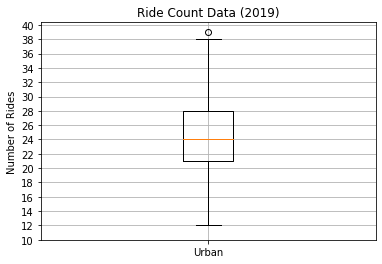

In [58]:
#Create plot for urban cities ride count
x_labels=['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

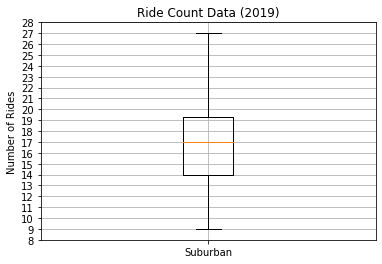

In [63]:
#Create plot for suburban cities ride count
x_labels=['Suburban']
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8,29,step=1.0))
ax.grid()
plt.show()

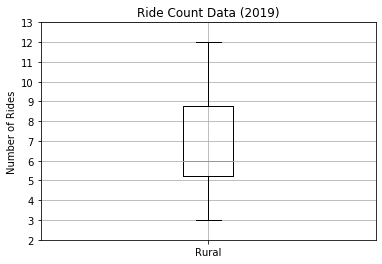

In [67]:
#Create plot for rural cities ride count
x_labels=['Rural']
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2,14,step=1.0))
ax.grid()
plt.show()

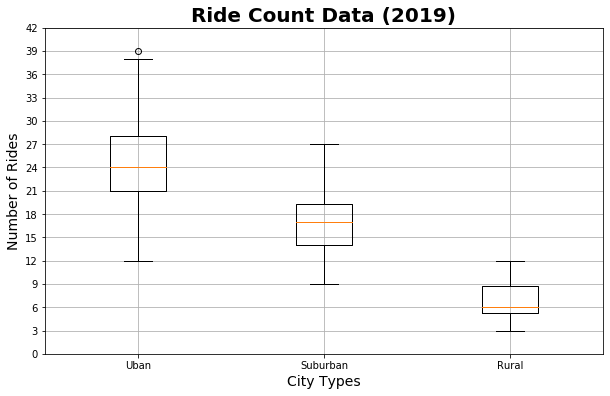

In [119]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=['Uban','Suburban','Rural']
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20, weight='bold')
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
#Save the figure
plt.savefig('analysis/Fig2.png')
plt.show()

In [70]:
#Identify outlier
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [ ]:
#Fare Prices Analysis

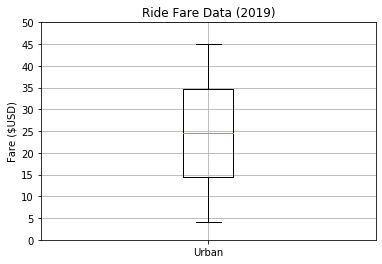

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [71]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

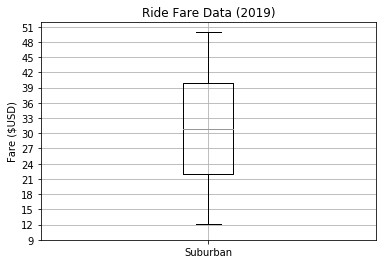

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [81]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels=['Suburban']
fig, ax=plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(9,53,step=3.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_fares.describe()

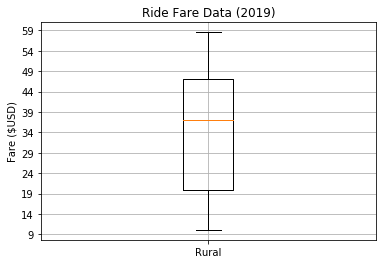

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [86]:
# Create a box-and-whisker plot for the rural fare data.
x_labels=['Rural']
fig, ax=plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(9,60,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
rural_fares.describe()

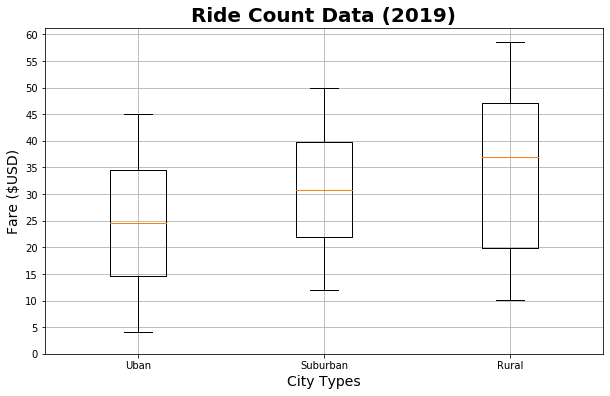

In [118]:
# Add all fare price box-and-whisker plots to the same graph.
x_labels=['Uban','Suburban','Rural']
fares_price_data=[urban_fares, suburban_fares, rural_fares]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20, weight='bold')
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fares_price_data, labels=x_labels)
ax.set_yticks(np.arange(0,61,step=5.0))
ax.grid()
#Save the figure
plt.savefig('analysis/Fig3.png')
plt.show()

In [95]:
#Driver Count Analysis

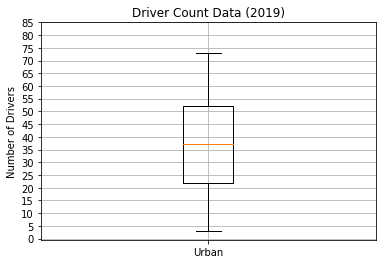

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [96]:
# Create a box-and-whisker plot for the urban driver count data.
x_labels=['Urban']
fig, ax=plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()

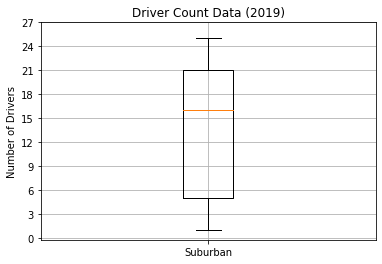

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [103]:
# Suburban driver count data plot.
x_labels=['Suburban']
fig, ax=plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,28,step=3.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_drivers.describe()

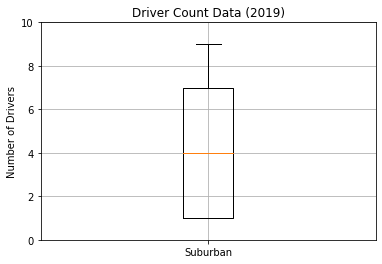

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [101]:
# Rural driver count data plot.
x_labels=['Suburban']
fig, ax=plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,11,step=2.0))
ax.grid()
plt.show()
print('Summary Statistics')
rural_drivers.describe()

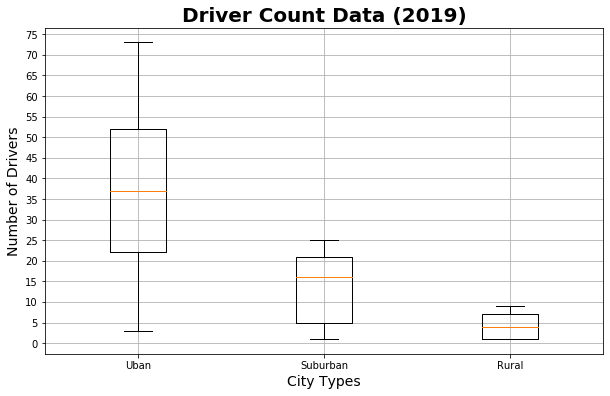

In [117]:
# All driver count analysis.
x_labels=['Uban','Suburban','Rural']
drivers_count_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20, weight='bold')
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(drivers_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()
#Save the figure
plt.savefig('analysis/Fig4.png')
plt.show()

In [106]:
# Alternative graph - Pie Chart

In [ ]:
# Fare price per city
# - Get the total fares for each city type.
# - Get the total for all the fares for all the city types.
# - Calculate the percentage of the total fares for each city type.

In [107]:
# Get the sum of the fares for each city type.
sum_fares_by_type=pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [111]:
# Get the sum of all the fares.
total_fares=pyber_data_df['fare'].sum()
total_fares

63538.64

In [112]:
# Calculate the percentage of fare for each city type.
type_percents=100*sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

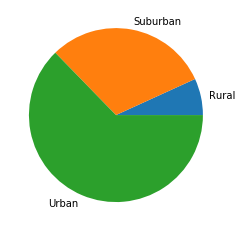

In [113]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

In [121]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

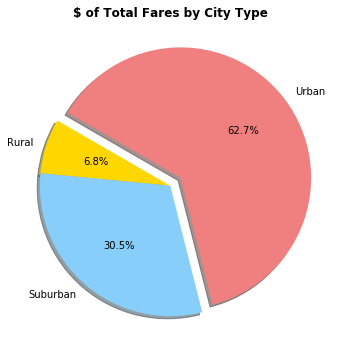

In [123]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
       labels=['Rural', 'Suburban', 'Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title('$ of Total Fares by City Type', weight='bold')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size']=14
# Save Figure
plt.savefig("analysis/Fig5.png")

plt.show()

In [124]:
#Ride Count
# - Get the total number of rides for each city type.
# - Get the total rides for all the city types.
# - Calculate the percentage of the total rides for each city type.

In [125]:
# Calculate the percentage of rides for each city type.
ride_percents=100*pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

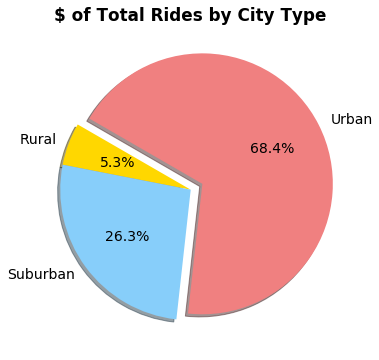

In [126]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels=['Rural', 'Suburban', 'Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title('$ of Total Rides by City Type', weight='bold')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size']=14
# Save Figure
plt.savefig("analysis/Fig6.png")

plt.show()